In [1]:
import sys
from pathlib import Path
from tqdm import tqdm
from PIL import Image
import pandas as pd
import random

sys.path.append(str(Path("..").resolve()))
from src import *

In [2]:
dataset = ObjaverseDataset3D()

In [3]:
TESTSET_DIR = Path("./dataset/test")
testset = pd.read_csv(TESTSET_DIR / "metadata.csv")
testset.index = pd.Series(testset.uv_file_name.map(lambda x: Path(x).stem), name="uid")

In [4]:
gt_dir = TESTSET_DIR / "diffuse"
vanilla_dir = Path("tests/lllyasviel-sd-controlnet-mlsd")
trained_dir = Path("tests/SD1.5_CNmlsd_96bs_1e-5lr_8k_masked-gt_4920s")

In [5]:
sample_files = random.sample(list(trained_dir.glob("*.png")), k=5)

captions,gt_renders, vanilla_renderings, trained_renderings = [], [], [],[]
for i, file in enumerate(sample_files):
    uid = Path(file).stem
    captions.append(testset.caption[uid])
    obj = dataset[uid]
    gt_renders.append(obj.render(views=1)[0])

    obj.set_texture(str(vanilla_dir / f"{uid}.png"))
    vanilla_renderings.append(obj.render(views=1)[0])

    obj.set_texture(str(trained_dir / f"{uid}.png"))
    trained_renderings.append(obj.render(views=1)[0])

16:30:23 | INFO: Data are loaded, start creating Blender stuff


[05/27/25 16:30:23] INFO     Data are loaded, start creating Blender stuff

16:30:23 | INFO: Blender create Mesh node Object_0


                    INFO     Blender create Mesh node Object_0

16:30:23 | INFO: glTF import finished in 0.01s


                    INFO     glTF import finished in 0.01s

  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:10.40M (Peak 10.40M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Object_2
Fra:1 Mem:12.45M (Peak 12.45M) | Time:00:00.05 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:12.44M (Peak 12.45M) | Time:00:00.05 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_0
Fra:1 Mem:16.28M (Peak 20.45M) | Time:00:00.06 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:16.28M (Peak 20.45M) | Time:00:00.06 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:16.28M (Peak 20.45M) | Time:00:00.06 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:16.28M (Peak 20.45M) | Time:00:00.06 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:16.37M (Peak 20.45M) | Time:00:00.09 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Updating Procedurals
Fra:1 Mem:16.37M (Peak 20.45M) | Time:00:

100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


Fra:1 Mem:236.72M (Peak 498.31M) | Time:00:02.36 | Mem:215.19M, Peak:356.16M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:236.72M (Peak 498.31M) | Time:00:02.36 | Mem:215.19M, Peak:356.16M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmp_lw4kmhi.png'
Time: 00:02.48 (Saving: 00:00.10)



  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:12.41M (Peak 12.41M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Object_2
Fra:1 Mem:12.46M (Peak 12.46M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:12.28M (Peak 12.46M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:12.28M (Peak 12.46M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:12.28M (Peak 12.46M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:12.28M (Peak 12.46M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:12.36M (Peak 12.46M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Procedurals
Fra:1 Mem:12.36M (Peak 12.46M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Background
Fra:1 Mem:12.36M (Peak 12.46M) | Time:00:00.01 | Mem:0.

100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


Fra:1 Mem:236.73M (Peak 498.32M) | Time:00:01.96 | Mem:215.19M, Peak:356.16M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:236.73M (Peak 498.32M) | Time:00:01.96 | Mem:215.19M, Peak:356.16M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmp6c1fsq0i.png'
Time: 00:02.06 (Saving: 00:00.02)



  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:12.42M (Peak 12.42M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Object_2
Fra:1 Mem:12.46M (Peak 12.46M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:12.28M (Peak 12.46M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:12.28M (Peak 12.46M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:12.28M (Peak 12.46M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:12.28M (Peak 12.46M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:12.37M (Peak 12.46M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Procedurals
Fra:1 Mem:12.37M (Peak 12.46M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Background
Fra:1 Mem:12.37M (Peak 12.46M) | Time:00:00.00 | Mem:0.

100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fra:1 Mem:236.73M (Peak 498.32M) | Time:00:02.08 | Mem:215.19M, Peak:356.16M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:236.73M (Peak 498.32M) | Time:00:02.08 | Mem:215.19M, Peak:356.16M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmpscmx4vh4.png'
Time: 00:02.17 (Saving: 00:00.07)



  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:13.44M (Peak 13.44M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Object_2
Fra:1 Mem:13.52M (Peak 13.52M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:13.51M (Peak 13.52M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_2
Fra:1 Mem:13.51M (Peak 13.52M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_0
Fra:1 Mem:13.51M (Peak 13.52M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_1
Fra:1 Mem:16.31M (Peak 17.53M) | Time:00:00.05 | Mem:3.00M, Peak:3.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:16.32M (Peak 17.53M) | Time:00:00.05 | Mem:3.00M, Peak:3.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:16.32M (Peak 17.53M) | Time:00:00.05 | Mem:3.00M, Peak:3.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:1

100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Fra:1 Mem:236.78M (Peak 498.37M) | Time:00:02.18 | Mem:214.22M, Peak:355.19M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:236.78M (Peak 498.37M) | Time:00:02.18 | Mem:214.22M, Peak:355.19M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmp9b6gfh6q.png'
Time: 00:02.27 (Saving: 00:00.07)



  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:13.45M (Peak 13.45M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Object_2
Fra:1 Mem:13.52M (Peak 13.52M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:13.51M (Peak 13.52M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_2
Fra:1 Mem:13.51M (Peak 13.52M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_1
Fra:1 Mem:15.32M (Peak 16.54M) | Time:00:00.05 | Mem:2.00M, Peak:2.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:15.32M (Peak 16.54M) | Time:00:00.05 | Mem:2.00M, Peak:2.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:15.32M (Peak 16.54M) | Time:00:00.05 | Mem:2.00M, Peak:2.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:15.32M (Peak 16.54M) | Time:00:00.05 | Mem:2.00M, Peak:2.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:15.40M (Peak 16.54

100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


Fra:1 Mem:239.78M (Peak 501.37M) | Time:00:02.26 | Mem:217.22M, Peak:358.19M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:239.78M (Peak 501.37M) | Time:00:02.26 | Mem:217.22M, Peak:358.19M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmpm7e_vwcp.png'
Time: 00:02.29 (Saving: 00:00.02)



  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:13.45M (Peak 13.45M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Object_2
Fra:1 Mem:13.53M (Peak 13.53M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:13.52M (Peak 13.53M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_2
Fra:1 Mem:13.52M (Peak 13.53M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_1
Fra:1 Mem:15.32M (Peak 16.54M) | Time:00:00.04 | Mem:2.00M, Peak:2.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:15.32M (Peak 16.54M) | Time:00:00.04 | Mem:2.00M, Peak:2.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:15.32M (Peak 16.54M) | Time:00:00.04 | Mem:2.00M, Peak:2.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:15.32M (Peak 16.54M) | Time:00:00.04 | Mem:2.00M, Peak:2.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:15.41M (Peak 16.54

100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fra:1 Mem:239.78M (Peak 501.38M) | Time:00:02.07 | Mem:217.22M, Peak:358.19M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:239.78M (Peak 501.38M) | Time:00:02.07 | Mem:217.22M, Peak:358.19M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmpmq05el1v.png'
Time: 00:02.18 (Saving: 00:00.02)



  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:14.42M (Peak 14.42M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | defaultMaterial
Fra:1 Mem:14.62M (Peak 14.62M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:14.61M (Peak 14.62M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_2
Fra:1 Mem:14.61M (Peak 14.62M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_0
Fra:1 Mem:18.61M (Peak 18.61M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_1
Fra:1 Mem:26.39M (Peak 30.63M) | Time:00:00.09 | Mem:12.00M, Peak:12.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:26.40M (Peak 30.63M) | Time:00:00.09 | Mem:12.00M, Peak:12.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:26.40M (Peak 30.63M) | Time:00:00.09 | Mem:12.00M, Peak:12.00M | Scene, ViewLayer | Updating Scen

100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


Fra:1 Mem:246.96M (Peak 508.55M) | Time:00:02.11 | Mem:223.36M, Peak:364.32M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:246.96M (Peak 508.55M) | Time:00:02.11 | Mem:223.36M, Peak:364.32M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmp8tl031af.png'
Time: 00:02.21 (Saving: 00:00.08)



  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:14.45M (Peak 14.45M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | defaultMaterial
Fra:1 Mem:14.62M (Peak 14.62M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:14.61M (Peak 14.62M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_2
Fra:1 Mem:14.61M (Peak 14.62M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_1
Fra:1 Mem:22.40M (Peak 26.63M) | Time:00:00.07 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:22.40M (Peak 26.63M) | Time:00:00.07 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:22.40M (Peak 26.63M) | Time:00:00.07 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:22.40M (Peak 26.63M) | Time:00:00.07 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:22.48M (Pea

100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


Fra:1 Mem:246.96M (Peak 508.55M) | Time:00:02.27 | Mem:223.36M, Peak:364.32M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:246.96M (Peak 508.55M) | Time:00:02.27 | Mem:223.36M, Peak:364.32M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmpa0efvook.png'
Time: 00:02.32 (Saving: 00:00.02)



  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:14.46M (Peak 14.46M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | defaultMaterial
Fra:1 Mem:14.63M (Peak 14.63M) | Time:00:00.02 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:14.62M (Peak 14.63M) | Time:00:00.02 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_2
Fra:1 Mem:14.62M (Peak 14.63M) | Time:00:00.02 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_1
Fra:1 Mem:22.41M (Peak 26.64M) | Time:00:00.04 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:22.41M (Peak 26.64M) | Time:00:00.04 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:22.41M (Peak 26.64M) | Time:00:00.04 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:22.41M (Peak 26.64M) | Time:00:00.04 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:22.49M (Pea

100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


Fra:1 Mem:246.97M (Peak 508.56M) | Time:00:02.24 | Mem:223.36M, Peak:364.32M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:246.97M (Peak 508.56M) | Time:00:02.24 | Mem:223.36M, Peak:364.32M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmpwli5ye6a.png'
Time: 00:02.35 (Saving: 00:00.02)



  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:13.35M (Peak 13.35M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Wastafel_lambert4_0
Fra:1 Mem:13.44M (Peak 13.44M) | Time:00:00.04 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:13.43M (Peak 13.44M) | Time:00:00.04 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_0
Fra:1 Mem:17.26M (Peak 21.44M) | Time:00:00.07 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:17.27M (Peak 21.44M) | Time:00:00.07 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:17.27M (Peak 21.44M) | Time:00:00.07 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:17.27M (Peak 21.44M) | Time:00:00.07 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:17.35M (Peak 21.44M) | Time:00:00.07 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Updating Procedurals
Fra:1 Mem:17.35M (Peak 21.44M)

100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


Fra:1 Mem:237.74M (Peak 499.33M) | Time:00:02.16 | Mem:215.24M, Peak:356.21M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:237.74M (Peak 499.33M) | Time:00:02.16 | Mem:215.24M, Peak:356.21M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmpck3j2qtn.png'
Time: 00:02.25 (Saving: 00:00.07)



  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:13.37M (Peak 13.37M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Wastafel_lambert4_0
Fra:1 Mem:13.44M (Peak 13.44M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:13.26M (Peak 13.44M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:13.26M (Peak 13.44M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:13.26M (Peak 13.44M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:13.26M (Peak 13.44M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:13.34M (Peak 13.44M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Procedurals
Fra:1 Mem:13.34M (Peak 13.44M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Background
Fra:1 Mem:13.34M (Peak 13.44M) | Time:00:00.

100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


Fra:1 Mem:237.74M (Peak 499.33M) | Time:00:01.97 | Mem:215.24M, Peak:356.21M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:237.74M (Peak 499.33M) | Time:00:01.97 | Mem:215.24M, Peak:356.21M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmp2nr_zen8.png'
Time: 00:02.00 (Saving: 00:00.01)



  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:13.37M (Peak 13.37M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Wastafel_lambert4_0
Fra:1 Mem:13.44M (Peak 13.44M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:13.26M (Peak 13.44M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:13.26M (Peak 13.44M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:13.26M (Peak 13.44M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:13.26M (Peak 13.44M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:13.35M (Peak 13.44M) | Time:00:00.05 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Procedurals
Fra:1 Mem:13.35M (Peak 13.44M) | Time:00:00.05 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Background
Fra:1 Mem:13.35M (Peak 13.44M) | Time:00:00.

100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fra:1 Mem:237.74M (Peak 499.34M) | Time:00:02.07 | Mem:215.24M, Peak:356.21M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:237.74M (Peak 499.34M) | Time:00:02.07 | Mem:215.24M, Peak:356.21M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmp31f9x9va.png'
Time: 00:02.17 (Saving: 00:00.07)



  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:12.65M (Peak 12.65M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | pCylinder1_uv_mat_0
Fra:1 Mem:12.67M (Peak 12.67M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:12.66M (Peak 12.67M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_0
Fra:1 Mem:16.50M (Peak 20.67M) | Time:00:00.01 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:16.50M (Peak 20.67M) | Time:00:00.01 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:16.50M (Peak 20.67M) | Time:00:00.01 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:16.50M (Peak 20.67M) | Time:00:00.01 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:16.59M (Peak 20.67M) | Time:00:00.02 | Mem:4.00M, Peak:4.00M | Scene, ViewLayer | Updating Procedurals
Fra:1 Mem:16.59M (Peak 20.67M)

100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fra:1 Mem:236.91M (Peak 498.50M) | Time:00:02.09 | Mem:215.16M, Peak:356.13M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:236.91M (Peak 498.50M) | Time:00:02.09 | Mem:215.16M, Peak:356.13M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmphwm6ozm5.png'
Time: 00:02.14 (Saving: 00:00.02)



  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:12.65M (Peak 12.65M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | pCylinder1_uv_mat_0
Fra:1 Mem:12.67M (Peak 12.67M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:12.49M (Peak 12.67M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:12.49M (Peak 12.67M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:12.49M (Peak 12.67M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:12.49M (Peak 12.67M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:12.58M (Peak 12.67M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Procedurals
Fra:1 Mem:12.58M (Peak 12.67M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Background
Fra:1 Mem:12.58M (Peak 12.67M) | Time:00:00.

100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


Fra:1 Mem:236.92M (Peak 498.51M) | Time:00:02.03 | Mem:215.16M, Peak:356.13M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:236.92M (Peak 498.51M) | Time:00:02.03 | Mem:215.16M, Peak:356.13M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmp7rbm831z.png'
Time: 00:02.07 (Saving: 00:00.02)



  0%|          | 0/1 [00:00<?, ?it/s]

Fra:1 Mem:12.66M (Peak 12.66M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | pCylinder1_uv_mat_0
Fra:1 Mem:12.68M (Peak 12.68M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:12.50M (Peak 12.68M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:12.50M (Peak 12.68M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:12.50M (Peak 12.68M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:12.50M (Peak 12.68M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:12.58M (Peak 12.68M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Procedurals
Fra:1 Mem:12.58M (Peak 12.68M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Background
Fra:1 Mem:12.58M (Peak 12.68M) | Time:00:00.

100%|██████████| 1/1 [00:02<00:00,  2.18s/it]

Fra:1 Mem:236.92M (Peak 498.51M) | Time:00:02.07 | Mem:215.16M, Peak:356.13M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:236.92M (Peak 498.51M) | Time:00:02.07 | Mem:215.16M, Peak:356.13M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmp4wf704ge.png'
Time: 00:02.17 (Saving: 00:00.02)



a sharp, metallic knife with a purple handle and a blue blade, featuring a textured grip for a secure hold.


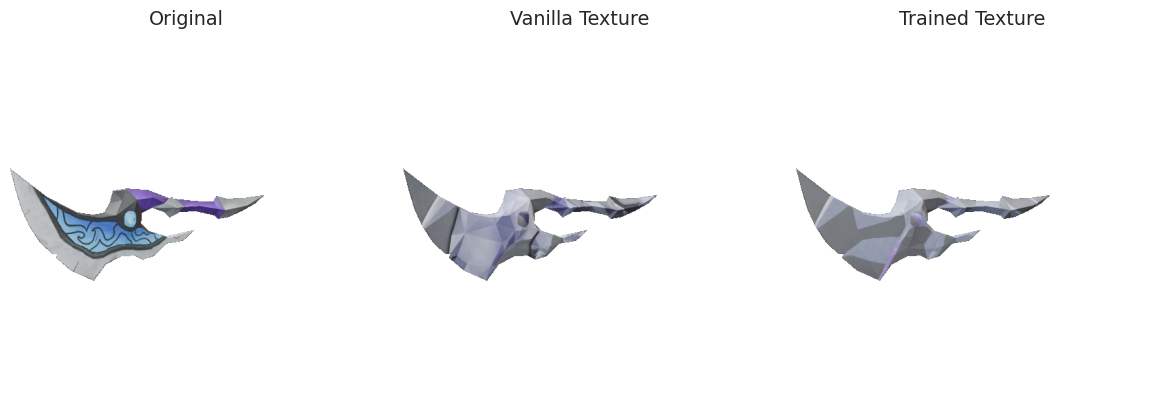

a modern woven armchair with a dark gray color and a textured fabric, featuring a geometric design with a high back and armrests.


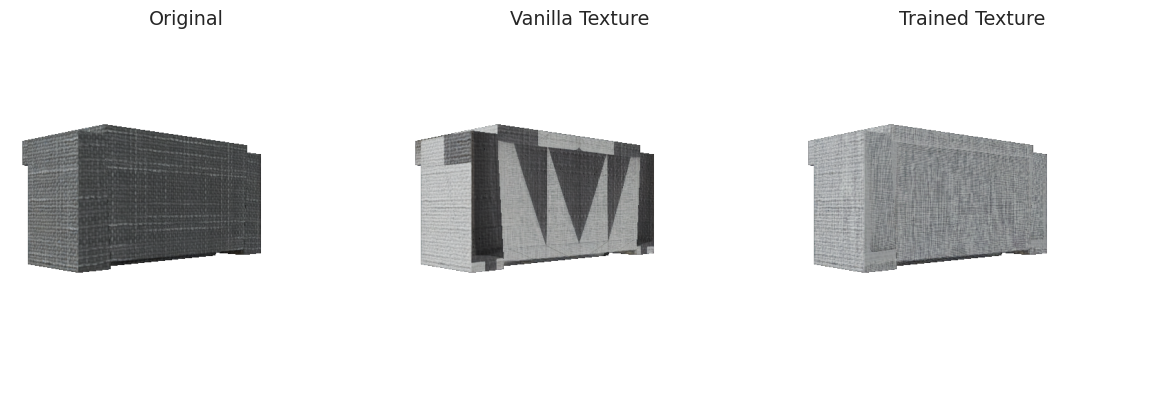

a rustic wooden chest with a curved top and a metal latch, featuring a distressed finish with a golden metal frame.


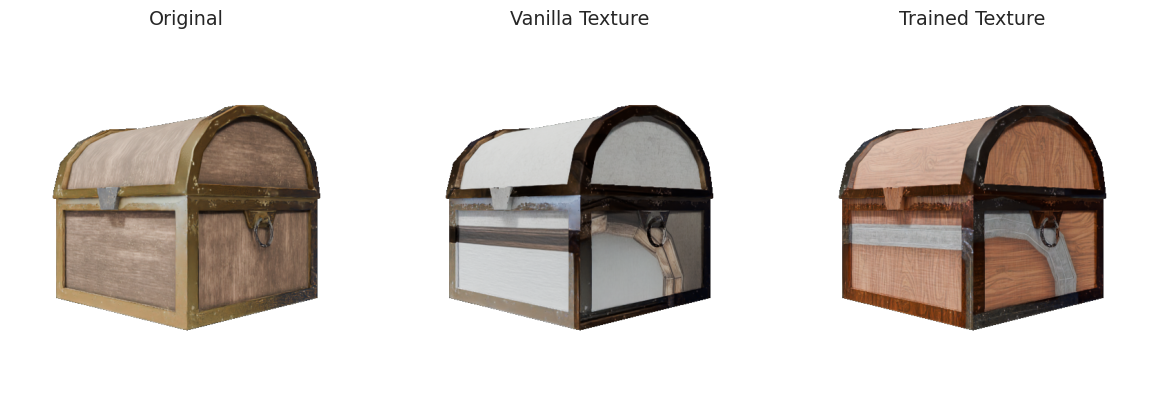

a rectangular marble sink with a smooth, polished surface and a single faucet, featuring a mix of white and gray veining.


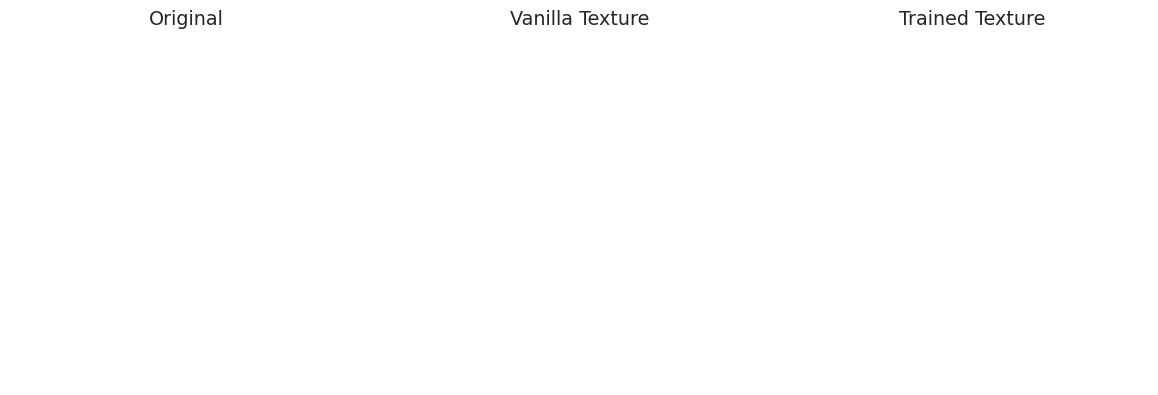

a 3d rendering of a colorful, block-shaped puzzle with numbers on each face, featuring a variety of vibrant colors and a grid-like texture.


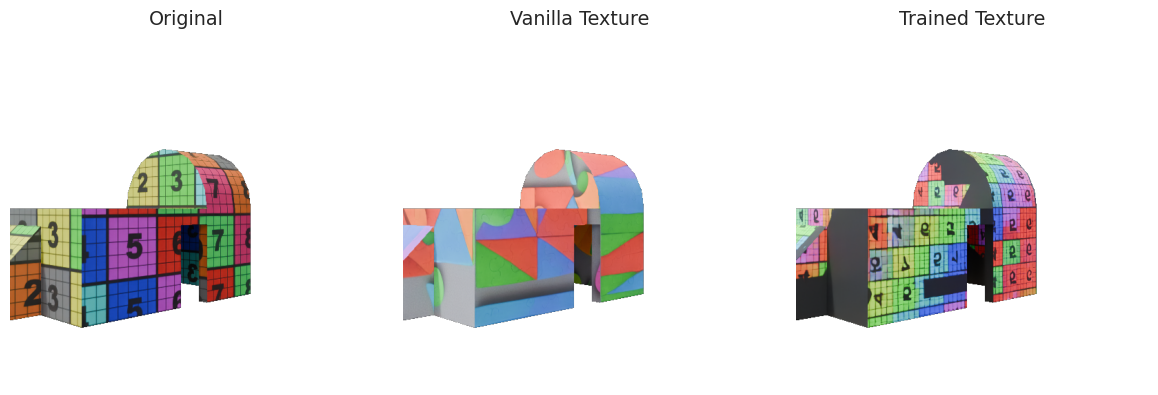

In [6]:
for caption, gt_render, vanilla_rendering, trained_rendering in zip(
    captions, gt_renders, vanilla_renderings, trained_renderings
):
    cprint(f"green:{caption}")
    plot_images(
        images={
            "Original": gt_render,
            "Vanilla Texture": vanilla_rendering,
            "Trained Texture": trained_rendering,
        },
        size=4,
    )